In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [32]:
glass = pd.read_csv('D:\Internship/glass.csv')
glass

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [33]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [34]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [35]:
glass.describe()

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [36]:
glass[glass.duplicated()].shape

(0, 11)

In [37]:
glass[glass.duplicated()]

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type


In [38]:
df = glass.drop_duplicates()

In [39]:
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [40]:
corr = df.corr()
corr

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
ID,1.000000,-0.072209,0.375722,-0.650328,0.490113,0.061232,0.003149,0.090800,0.451001,-0.072794,0.877357
RI,-0.072209,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,0.375722,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.650328,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,0.490113,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,0.061232,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,0.003149,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.090800,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,0.451001,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,-0.072794,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278


<AxesSubplot:>

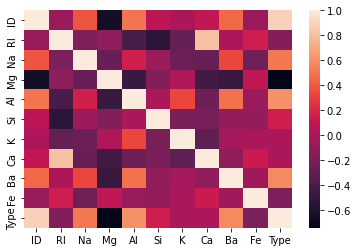

In [41]:
sns.heatmap(corr)

Scatter plot of two features, and pairwise plot

<AxesSubplot:xlabel='RI', ylabel='Na'>

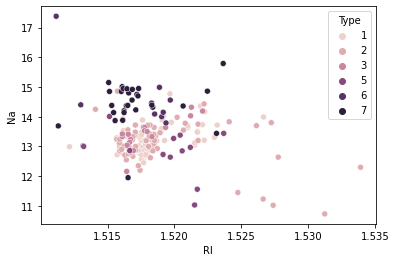

In [42]:
sns.scatterplot(df['RI'],df['Na'],hue=df['Type'])

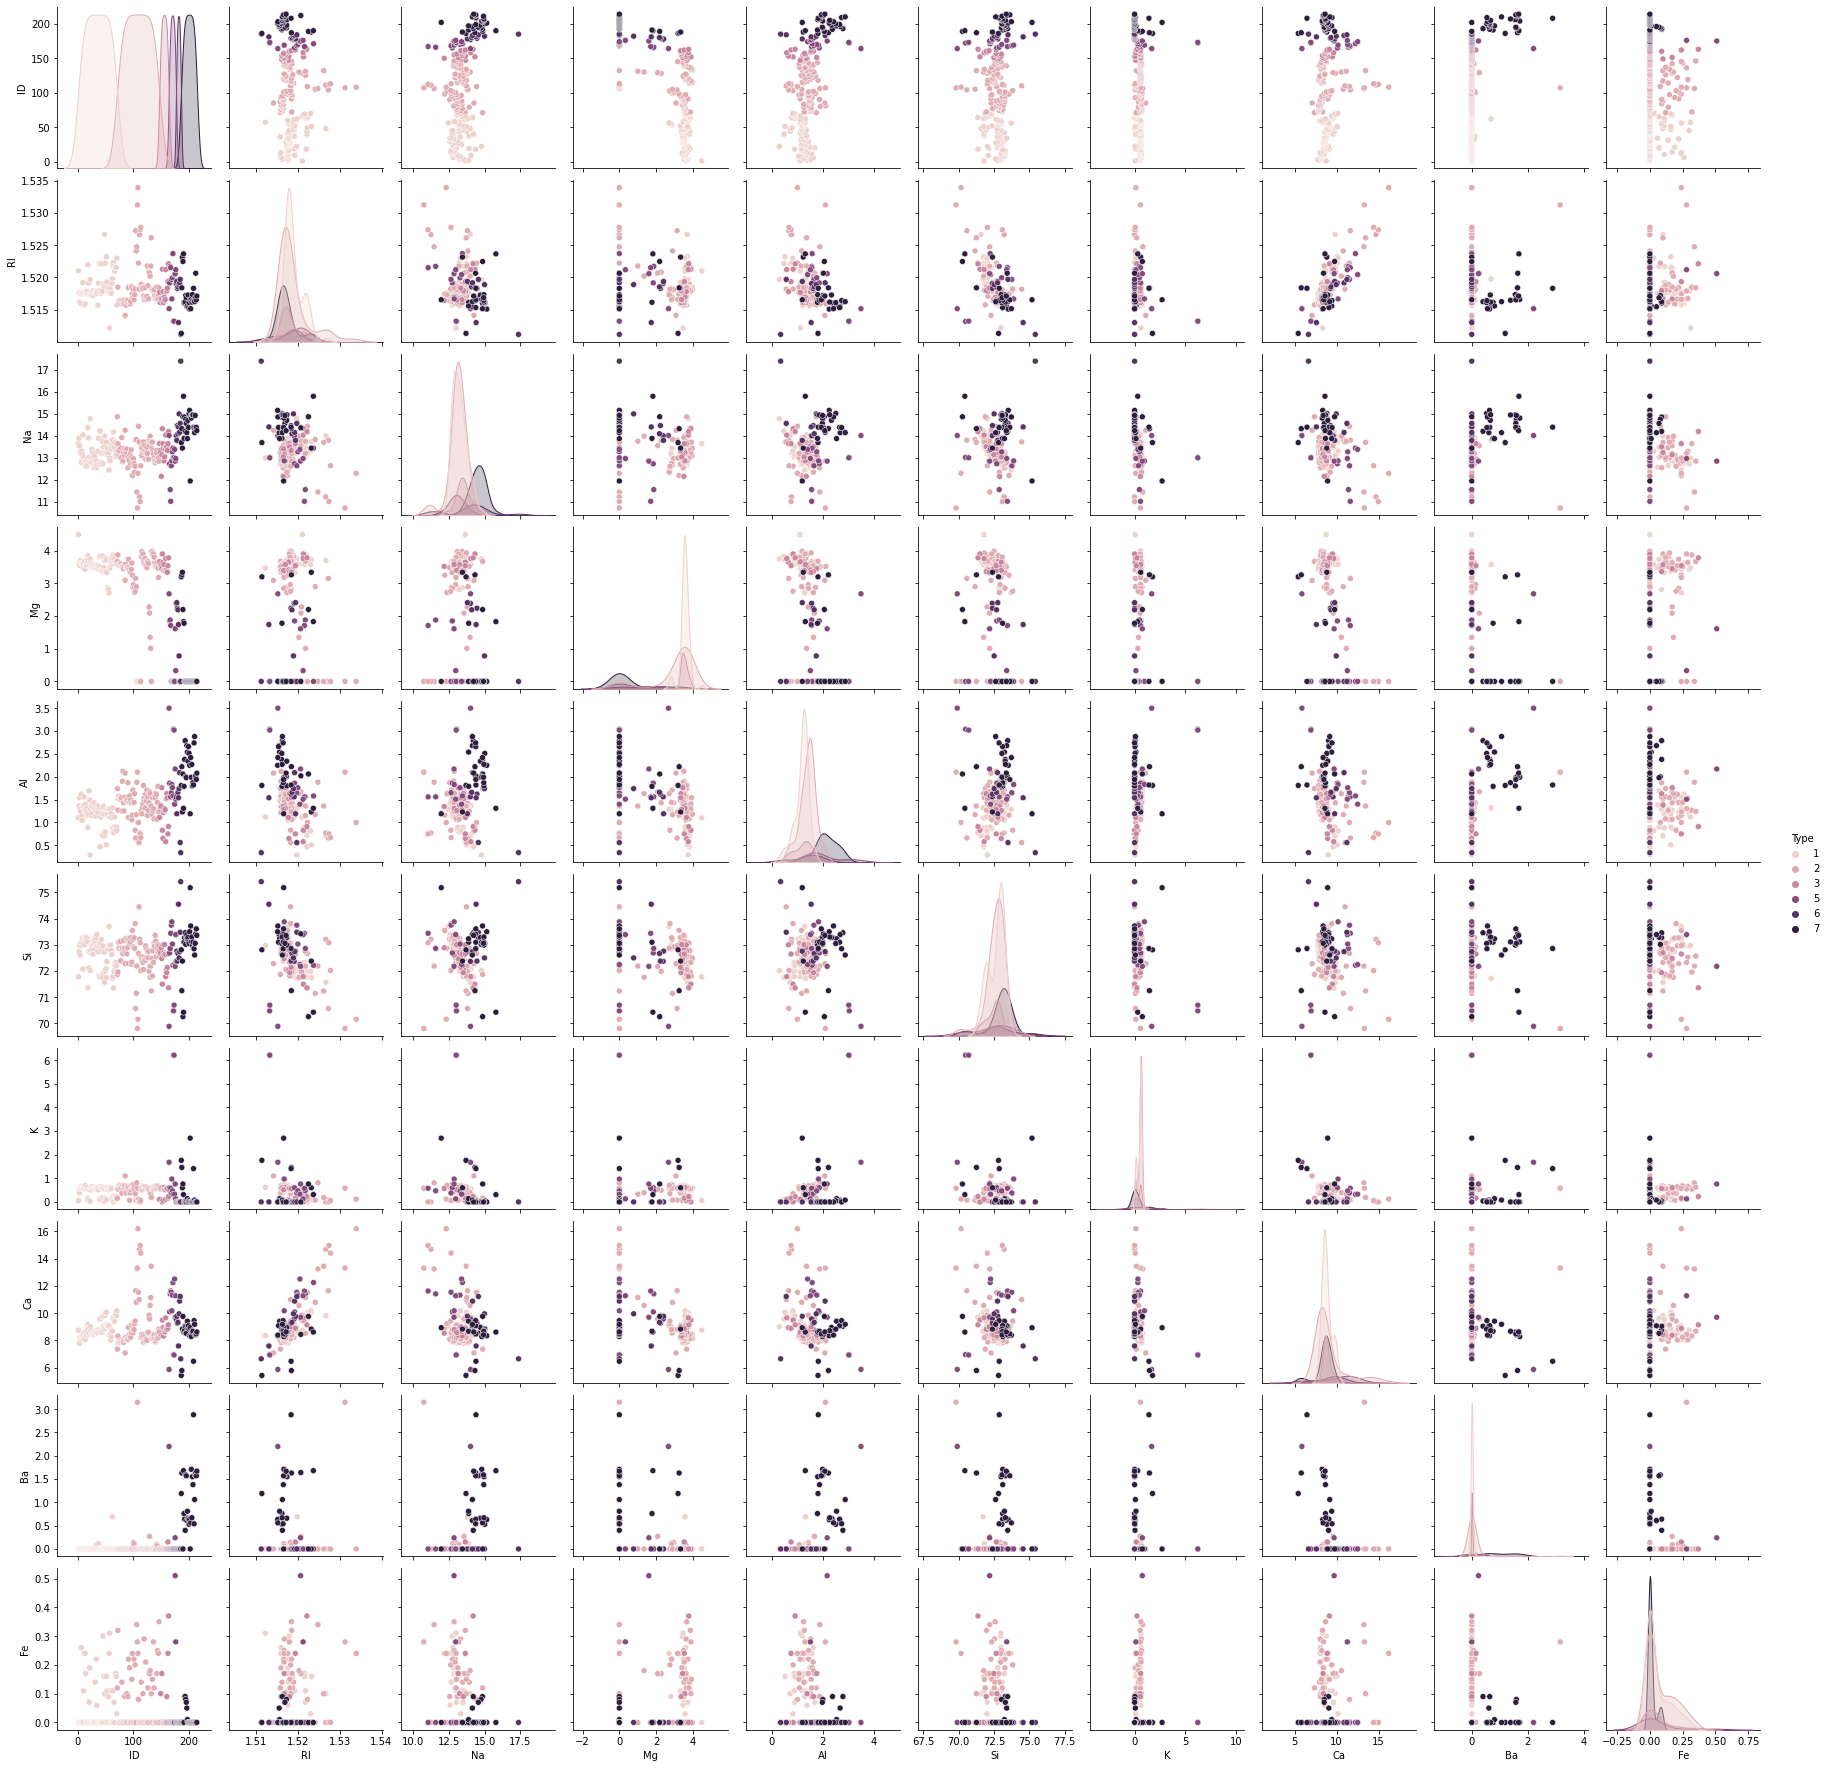

In [43]:
#pairwise plot of all the features
sns.pairplot(df,hue='Type')
plt.show()

In [44]:
#The pairplot shows that the data is not linear and KNN can be applied to get nearest neighbors and classify the glass types

In [45]:
df

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [46]:
DF= df.iloc[:,0:10]
DF

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0


In [47]:
array= DF.values
array

array([[  1.     ,   1.52101,  13.64   , ...,   8.75   ,   0.     ,
          0.     ],
       [  2.     ,   1.51761,  13.89   , ...,   7.83   ,   0.     ,
          0.     ],
       [  3.     ,   1.51618,  13.53   , ...,   7.78   ,   0.     ,
          0.     ],
       ...,
       [212.     ,   1.52065,  14.36   , ...,   8.44   ,   1.64   ,
          0.     ],
       [213.     ,   1.51651,  14.38   , ...,   8.48   ,   1.57   ,
          0.     ],
       [214.     ,   1.51711,  14.23   , ...,   8.62   ,   1.67   ,
          0.     ]])

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.72397593,  0.87286765,  0.28495326, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-1.70778837, -0.24933347,  0.59181718, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-1.6916008 , -0.72131806,  0.14993314, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 1.6916008 ,  0.75404635,  1.16872135, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [ 1.70778837, -0.61239854,  1.19327046, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [ 1.72397593, -0.41436305,  1.00915211, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

In [50]:
df_knn = pd.DataFrame(X,columns=df.columns[:-1])
df_knn

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...,...
209,1.659226,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,1.675413,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,1.691601,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,1.707788,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [51]:
x= df_knn
y= df['Type']

In [52]:
x

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,-1.723976,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-1.707788,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-1.691601,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-1.675413,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...,...
209,1.659226,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,1.675413,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,1.691601,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,1.707788,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


In [53]:
y

0      1
1      1
2      1
3      1
4      1
      ..
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [54]:
x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.3,random_state=45)

In [55]:
x_train

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
165,0.946973,1.103909,-2.268155,-0.559078,0.231064,0.270553,-0.041582,1.727705,-0.352877,-0.586451
132,0.412783,-0.077703,0.027188,0.900234,-0.531832,-0.208266,0.127475,-0.568354,-0.352877,-0.586451
72,-0.558471,-0.803833,-0.390147,0.629219,0.150759,0.581138,0.265795,-0.793734,-0.352877,-0.586451
58,-0.785097,-0.272438,0.088560,0.733456,-0.551908,0.438787,0.142844,-0.652871,-0.352877,-0.586451
29,-1.254536,-0.173420,-0.402422,0.559728,-0.331070,0.270553,0.158213,-0.328888,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...,...
32,-1.205974,-0.203125,-0.684737,0.552779,-0.431451,0.412905,0.173582,-0.279586,-0.171446,1.676673
124,0.283282,1.123713,-0.255127,0.691761,-0.592061,0.128201,0.066000,-0.307758,-0.352877,-0.586451
131,0.396595,2.566071,0.358601,-1.865511,-0.170460,-1.825899,-0.471910,3.157459,-0.352877,0.442242
158,0.833660,-0.199825,0.149933,0.504135,0.150759,-0.790614,0.127475,-0.117594,-0.352877,-0.586451


In [56]:
x_test

,ID,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
83,-0.380408,-0.800532,-0.390147,0.580575,0.210988,0.283494,0.281164,-0.638785,-0.352877,0.339372
62,-0.720347,1.107210,0.125384,0.816845,-1.134119,-1.114141,-0.410435,0.410640,-0.352877,0.545111
84,-0.364220,-1.411142,1.033701,0.281764,1.275028,-0.480029,0.926656,-1.321968,-0.352877,-0.586451
138,0.509908,-0.536485,-0.758384,0.580575,0.190912,0.917606,0.250426,-0.744432,-0.352877,-0.586451
188,1.319287,1.354754,1.782449,-0.336707,1.234875,-3.094124,0.404115,0.565589,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...,...
4,-1.659226,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
28,-1.270724,-0.226229,-1.040699,0.580575,-0.029927,0.645844,0.112107,-0.293672,-0.352877,-0.586451
114,0.121407,0.034517,-0.377873,0.893285,-0.511756,-0.272972,0.158213,-0.371146,-0.352877,-0.586451
186,1.286912,0.004812,1.119623,0.399898,1.556095,-1.812958,1.479935,-2.230531,2.933041,-0.586451


In [57]:
y_train

165    5
132    2
72     2
58     1
29     1
      ..
32     1
124    2
131    2
158    3
203    7
Name: Type, Length: 149, dtype: int64

In [58]:
y_test

83     2
62     1
84     2
138    2
188    7
      ..
4      1
28     1
114    2
186    7
125    2
Name: Type, Length: 65, dtype: int64

KNN Model

In [59]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [60]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category

1    23
2    22
7    10
6     4
3     3
5     3
dtype: int64

In [61]:
pd.crosstab(y_test,preds)

col_0,1,2,3,5,6,7
Type,,,,,,
1,20,0,0,0,0,0
2,2,21,2,1,0,0
3,1,1,1,0,0,0
5,0,0,0,1,0,0
6,0,0,0,0,2,0
7,0,0,0,1,2,10


In [62]:
print("Accuracy", accuracy_score(y_test,preds)*100)

Accuracy 84.61538461538461


In [63]:
model.score(x_train,y_train)

0.9328859060402684

In [64]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           1       0.87      1.00      0.93        20
           2       0.95      0.81      0.88        26
           3       0.33      0.33      0.33         3
           5       0.33      1.00      0.50         1
           6       0.50      1.00      0.67         2
           7       1.00      0.77      0.87        13

    accuracy                           0.85        65
   macro avg       0.67      0.82      0.70        65
weighted avg       0.89      0.85      0.85        65



Grid Search for Algorithm Tuning

In [65]:
n_neighbors = np.array(range(1,15))
param_grid = dict(n_neighbors=n_neighbors)

In [66]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(x, y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [67]:
print(grid.best_score_)
print(grid.best_params_)

0.8271317829457365
{'n_neighbors': 5}


Visualizing the CV results

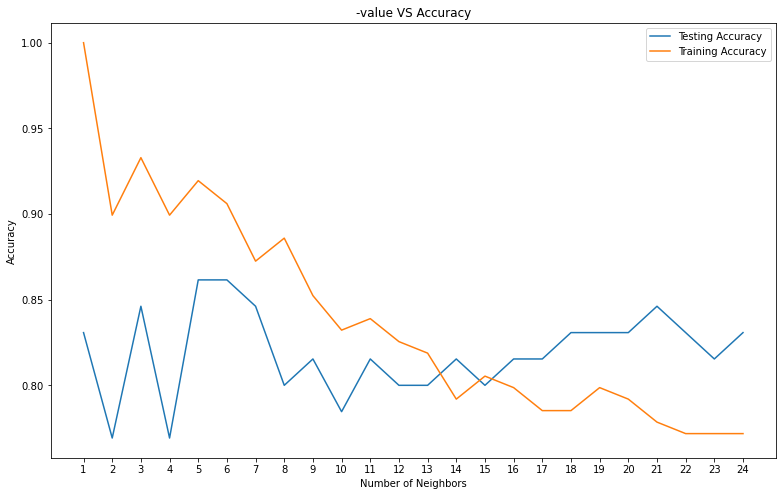

Best accuracy is 0.8615384615384616 with K = 5


In [68]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(k_values):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test, y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_values, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_values, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))